# PREPARACIÓN DE DATOS

In [47]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

#  Gestión de warnings
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

In [2]:
df = pd.read_pickle("../archivos/telco_customer_churn.pkl")
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [3]:
df.stb.missing()

,missing,total,percent
customerid,0,7032,0.0
onlinebackup,0,7032,0.0
monthlycharges,0,7032,0.0
paymentmethod,0,7032,0.0
paperlessbilling,0,7032,0.0
contract,0,7032,0.0
streamingtv,0,7032,0.0
techsupport,0,7032,0.0
deviceprotection,0,7032,0.0
onlinesecurity,0,7032,0.0


In [4]:
df.describe(include='object').T

,count,unique,top,freq
customerid,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
partner,7032,2,No,3639
dependents,7032,2,No,4933
phoneservice,7032,2,Yes,6352
multiplelines,7032,3,No,3385
internetservice,7032,3,Fiber optic,3096
onlinesecurity,7032,3,No,3497
onlinebackup,7032,3,No,3087
deviceprotection,7032,3,No,3094


In [5]:
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# Por qué nos lo cambia por un numero aleatorio
        

In [6]:
numeric = df.select_dtypes(include=np.number)
categoric = df.select_dtypes(exclude=np.number)
categoric.drop(['churn', 'customerid'], inplace=True, axis=1)

In [7]:
# Comprobamos nuevamente con la correlación que nuestras variables numércias son independientes
numeric.corr()

,tenure,monthlycharges
tenure,1.000000,0.246862
monthlycharges,0.246862,1.000000


In [8]:
numeric.columns


Index(['tenure', 'monthlycharges'], dtype='object')

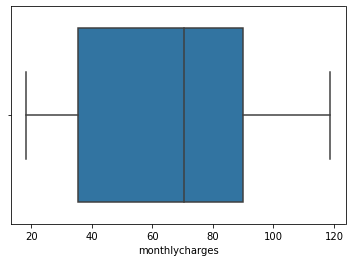

In [9]:
sns.boxplot(x = 'monthlycharges', data = numeric);

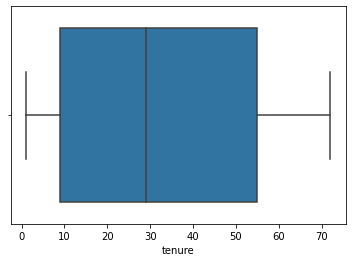

In [10]:
sns.boxplot(x = 'tenure', data = numeric);

*Observamos que nuestras variables numéricas no tienen outliers*

## Estandarización

Estandarizamos las variables numéricas, al no tener outliers usamos el StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(numeric)

StandardScaler()

In [13]:
X_escaladas = scaler.transform(numeric)

In [14]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numeric.columns)
numericas_estandar.head(2)

,tenure,monthlycharges
0,-1.280248,-1.161694
1,0.064303,-0.260878


In [15]:
numericas_estandar.reset_index(inplace=True, drop=True)

In [16]:
numericas_estandar.index

RangeIndex(start=0, stop=7032, step=1)

## Encoding

In [17]:
categoric

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check


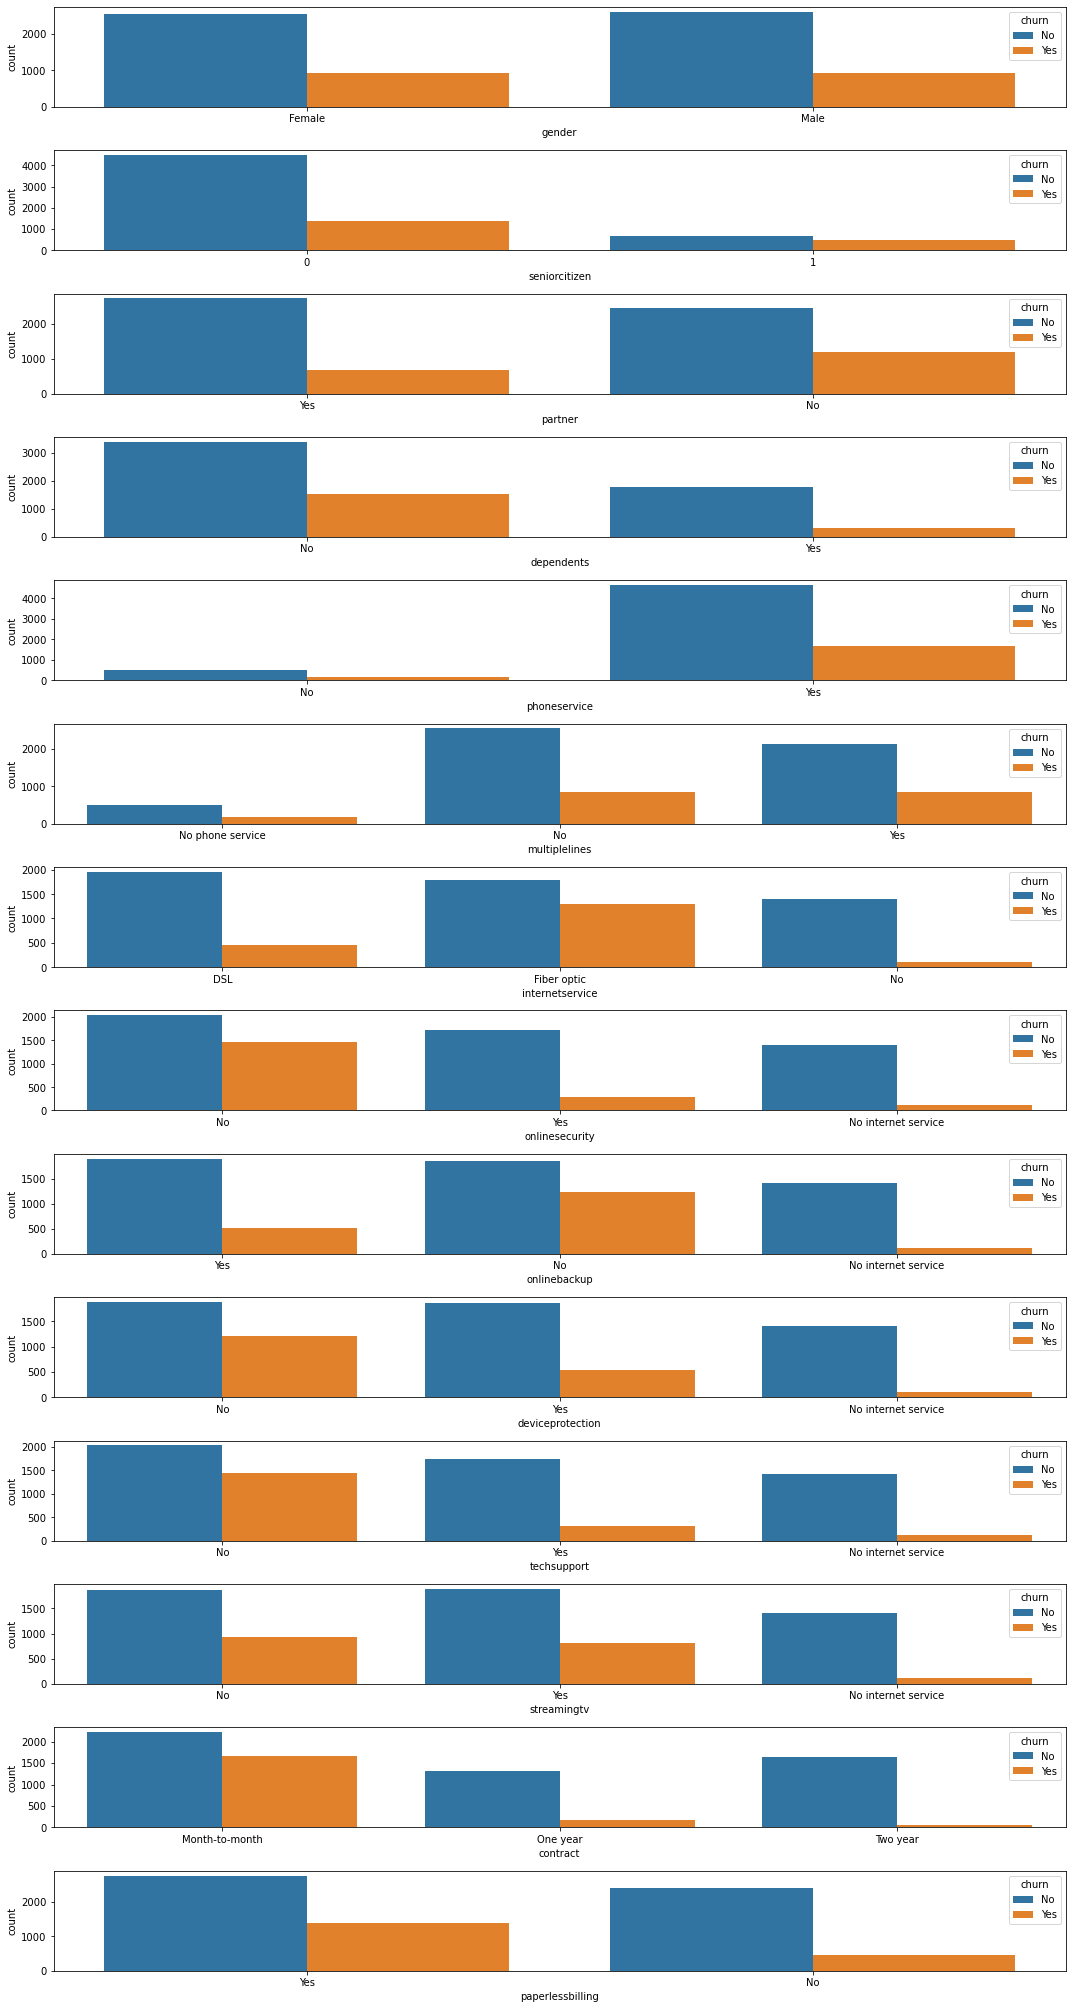

<Figure size 432x288 with 0 Axes>

In [18]:
fig, axes = plt.subplots(15, figsize=(15,30))
axes = axes.flat

for indice, columna in enumerate(categoric.columns):
    sns.countplot(x = categoric[columna], hue='churn', data = df, ax=axes[indice]);

plt.tight_layout()
fig.delaxes(axes[indice])
plt.show()
plt.savefig('subplots_categoricas.png');

In [19]:
categoric.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

Variables predictoras categóricas:
- Ordinales = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'contract', 'paymentmethod']
- No ordinales = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'streamingtv', 'paperlessbilling']

In [20]:
si_ordinal = categoric[['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'contract', 'paymentmethod']] 
no_ordinal = categoric[['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'streamingtv', 'paperlessbilling']]

In [21]:
si_ordinal.head()

,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod
0,DSL,No,Yes,No,No,Month-to-month,Electronic check
1,DSL,Yes,No,Yes,No,One year,Mailed check
2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check
3,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic)
4,Fiber optic,No,No,No,No,Month-to-month,Electronic check


<AxesSubplot:xlabel='paymentmethod', ylabel='count'>

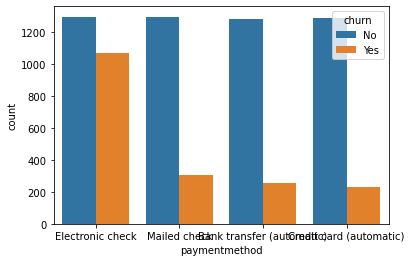

In [22]:
sns.countplot(x='paymentmethod', data= df, hue='churn')

In [23]:
no_ordinal.reset_index(inplace=True, drop=True)

In [24]:
no_ordinal.head()

,gender,partner,dependents,phoneservice,multiplelines,streamingtv,paperlessbilling
0,Female,Yes,No,No,No phone service,No,Yes
1,Male,No,No,Yes,No,No,No
2,Male,No,No,Yes,No,No,Yes
3,Male,No,No,No,No phone service,No,No
4,Female,No,No,Yes,No,No,Yes


In [25]:
no_ordinal.shape

(7032, 7)

In [26]:
no_ordinal.index

RangeIndex(start=0, stop=7032, step=1)

In [27]:
# primero creamos el dataframe para las variables categóricas no ordinales encodeadas con el metodo 'get_dummies'
encod_no_ord = pd.DataFrame()

for columna in no_ordinal.columns:
    df_dummies = pd.get_dummies(no_ordinal[columna], prefix_sep = "_", prefix = columna, dtype = int)
    encod_no_ord = pd.concat([encod_no_ord, df_dummies], axis = 1)

In [28]:
encod_no_ord.reset_index(inplace=True, drop=True)

In [29]:
encod_no_ord.index

RangeIndex(start=0, stop=7032, step=1)

In [30]:
encod_no_ord.isnull().sum()

gender_Female                      0
gender_Male                        0
partner_No                         0
partner_Yes                        0
dependents_No                      0
dependents_Yes                     0
phoneservice_No                    0
phoneservice_Yes                   0
multiplelines_No                   0
multiplelines_No phone service     0
multiplelines_Yes                  0
streamingtv_No                     0
streamingtv_No internet service    0
streamingtv_Yes                    0
paperlessbilling_No                0
paperlessbilling_Yes               0
dtype: int64

In [31]:
# después encodeamos las variables ordinales
dict_si_ordinal = {}

for col in si_ordinal.columns:
    dict_si_ordinal[col] = list(si_ordinal[col].unique())


In [32]:
len(categoric.columns)

15

In [33]:
dict_si_ordinal

{'internetservice': ['DSL', 'Fiber optic', 'No'],
 'onlinesecurity': ['No', 'Yes', 'No internet service'],
 'onlinebackup': ['Yes', 'No', 'No internet service'],
 'deviceprotection': ['No', 'Yes', 'No internet service'],
 'techsupport': ['No', 'Yes', 'No internet service'],
 'contract': ['Month-to-month', 'One year', 'Two year'],
 'paymentmethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)']}

## MAPAS

In [34]:
map_internet = {'DSL': 0, 'Fiber optic': 1, 'No': 0}
map_security = {'Yes': 0, 'No': 1, 'No internet service': 0}
map_backup = {'Yes': 1, 'No': 2, 'No internet service':0 }
map_protect = {'No':1 , 'Yes': 0, 'No internet service':0 }
map_support = {'No': 1, 'Yes': 0, 'No internet service': 0}
map_contract = {'Month-to-month': 2, 'One year': 1, 'Two year': 0}
map_pay = {'Electronic check': 2,
  'Mailed check':1,
  'Bank transfer (automatic)':1,
  'Credit card (automatic)':1}

In [35]:
mapas = [map_internet, map_security, map_backup,map_protect,map_support, map_contract, map_pay ]

In [36]:
for mapa, col in zip(mapas, si_ordinal.columns):
	df[col] = df[col].map(mapa)

In [37]:
encod_ord = df[si_ordinal.columns]

In [38]:
encod_ord.reset_index(inplace=True,drop=True)

In [39]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
churn               0
dtype: int64

In [40]:
df['churn'].shape

(7032,)

In [41]:
df_churn = df['churn']
df_churn.reset_index(inplace=True,drop=True)

In [42]:
df_churn.index

RangeIndex(start=0, stop=7032, step=1)

In [43]:
df_prep = pd.concat([numericas_estandar, encod_no_ord, encod_ord, df['churn']], axis=1, ignore_index=False)

In [44]:
df_prep

,tenure,monthlycharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,2,2,No
1,0.064303,-0.260878,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,0,1,1,1,No
2,-1.239504,-0.363923,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,2,1,Yes
3,0.512486,-0.747850,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,2,0,0,1,1,No
4,-1.239504,0.196178,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,1,2,1,1,2,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,2,0,0,1,1,No
7028,1.612573,1.276493,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,No
7029,-0.872808,-1.170004,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,2,1,1,2,2,No
7030,-1.158016,0.319168,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,2,1,1,2,1,Yes


In [45]:
df_prep.stb.missing().T

,tenure,monthlycharges,paymentmethod,contract,techsupport,deviceprotection,onlinebackup,onlinesecurity,internetservice,paperlessbilling_Yes,paperlessbilling_No,streamingtv_Yes,streamingtv_No internet service,streamingtv_No,multiplelines_Yes,multiplelines_No phone service,multiplelines_No,phoneservice_Yes,phoneservice_No,dependents_Yes,dependents_No,partner_Yes,partner_No,gender_Male,gender_Female,churn
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_prep.to_pickle('../archivos/telco_churn_prep.pkl')